In [1]:
import numpy as np

In [61]:
def tweedie_eval(y_pred, y_true, p=1.9):
    a = y_true*np.power(y_pred, (1-p)) / (1-p)
    b = np.power(y_pred, (2-p))/(2-p)
    loss = -a + b
    return np.mean(loss)

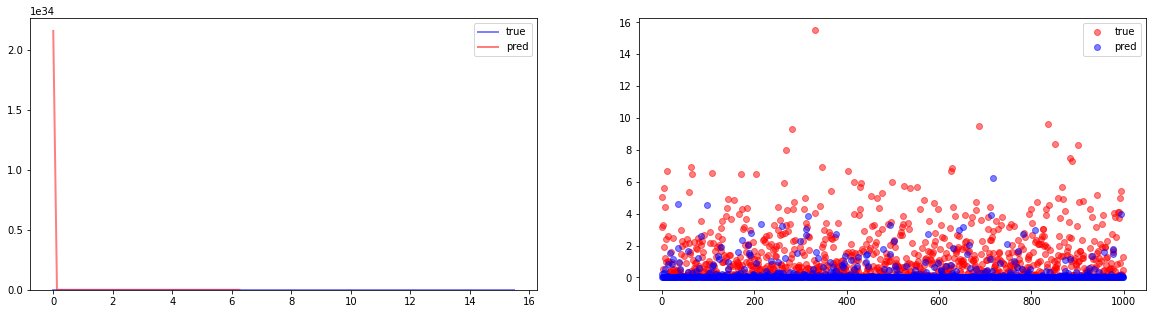

loss =  152.46272942047216
loss =  54.14285346560764
loss =  101.68267093374702
loss =  1597230978981364.2
loss =  8.149248558801543e+22


In [64]:
import matplotlib.pyplot as plt
import scipy.special as sps 


shape, scale = 0.7, 2.  # mean=4, std=2*sqrt(2)
y_true = np.random.gamma(shape, scale, 1000)
shape, scale = 0.1, 2.  # mean=4, std=2*sqrt(2)
y_pred = np.random.gamma(shape, scale, 1000)


fig = plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
count, bins, ignored = plt.hist(y_true, 50, density=True, color='b',alpha = 0.5) 
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='b',alpha = 0.5,label='true')  

count, bins, ignored = plt.hist(y_pred, 50, density=True, color='r',alpha = 0.5) 
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r',alpha = 0.5,label='pred')  

plt.legend()
plt.subplot(1,2,2)
plt.plot(y_true,'ro',alpha = 0.5,label='true')  
plt.plot(y_pred,'bo',alpha = 0.5,label='pred') 
plt.legend()

plt.show()




print('loss = ',tweedie_eval(y_pred, y_true, p=1.01))
print('loss = ',tweedie_eval(y_pred, y_true, p=1.05))
print('loss = ',tweedie_eval(y_pred, y_true, p=1.1))
print('loss = ',tweedie_eval(y_pred, y_true, p=1.5))
print('loss = ',tweedie_eval(y_pred, y_true, p=1.7))